# 개팔자가 상팔자는 옛말이다
### -전국 시도별 반려동물 등록 현황 및 관련 시설 데이터 분석-

## 1.데이터 준비하기

###패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.1 MB/s eta 0:00:00


### 패키지 임포트

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import koreanize_matplotlib

import folium # 지도 시각화

### 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ABC부트캠프/한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터_20221130.CSV', encoding='cp949')
df

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
1,1004섬수석미술관,반려동물업,반려동반여행,미술관,전라남도,신안군,자은면,백산리,633-54 번지,자은서부2길,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30
2,100세건강약국,반려동물업,반려의료,동물약국,경기도,안양시 만안구,안양동,NaN,856-4 번지,안양로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
3,100세약국,반려동물업,반려의료,동물약국,서울특별시,영등포구,당산2동,NaN,217-4 번지,양평로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
4,100세약국,반려동물업,반려의료,동물약국,경기도,수원시 팔달구,인계동,NaN,942-4 번지,경수대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,y동물병원,반려동물업,반려의료,동물병원,대구광역시,수성구,시지동,NaN,258-14 번지,달구벌대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"일반동물병원, 일요일 야간 예약진료 가능",없음,2022-11-30
23925,YOLO오시개,반려동물업,반려동물식당카페,카페,부산광역시,사상구,주례동,NaN,60-55 번지,가야대로366번길,...,10000원,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 호텔","2,000~6,000원",2022-11-30
23926,YS유통,반려동물업,반려동물 서비스,반려동물용품,경기도,파주시,조리읍,장곡리,73-3 번지,장곡로,...,없음,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음,2022-11-30
23927,ZOO동물병원,반려동물업,반려의료,동물병원,서울특별시,성북구,정릉동,NaN,16-162 번지,정릉로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30


### 데이터 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시설명           23929 non-null  object 
 1   카테고리1         23929 non-null  object 
 2   카테고리2         23929 non-null  object 
 3   카테고리3         23929 non-null  object 
 4   시도 명칭         23929 non-null  object 
 5   시군구 명칭        23784 non-null  object 
 6   법정읍면동명칭       23885 non-null  object 
 7   리 명칭          4795 non-null   object 
 8   번지            23872 non-null  object 
 9   도로명 이름        23623 non-null  object 
 10  건물 번호         23623 non-null  object 
 11  위도            23929 non-null  float64
 12  경도            23929 non-null  float64
 13  우편번호          23857 non-null  float64
 14  도로명주소         23623 non-null  object 
 15  지번주소          23929 non-null  object 
 16  전화번호          23929 non-null  object 
 17  홈페이지          23929 non-null  object 
 18  휴무일           23929 non-nu

## 2.시도별 반려동물 관련 시설 현황 데이터 전처리

### 필요한 컬럼만 추출

In [ ]:
df = df[['시설명', '카테고리3', '시도 명칭', '시군구 명칭', '위도', '경도']]
df

,시설명,카테고리3,시도 명칭,시군구 명칭,위도,경도
0,1004 약국,동물약국,경기도,고양시 덕양구,37.644543,126.886336
1,1004섬수석미술관,미술관,전라남도,신안군,34.880093,125.996874
2,100세건강약국,동물약국,경기도,안양시 만안구,37.407150,126.914837
3,100세약국,동물약국,서울특별시,영등포구,37.533260,126.903741
4,100세약국,동물약국,경기도,수원시 팔달구,37.276272,127.030911
...,...,...,...,...,...,...
23924,y동물병원,동물병원,대구광역시,수성구,35.842243,128.697815
23925,YOLO오시개,카페,부산광역시,사상구,35.150589,129.012454
23926,YS유통,반려동물용품,경기도,파주시,37.751561,126.844647
23927,ZOO동물병원,동물병원,서울특별시,성북구,37.601998,127.019541


In [ ]:
# 컬럼명 변경 후 저장
df['카테고리'] = df['카테고리3']
df = df[['시설명', '카테고리', '시도 명칭', '시군구 명칭','위도', '경도']]
df

<ipython-input-7-7142c2f33a90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['카테고리'] = df['카테고리3']


,시설명,카테고리,시도 명칭,시군구 명칭,위도,경도
0,1004 약국,동물약국,경기도,고양시 덕양구,37.644543,126.886336
1,1004섬수석미술관,미술관,전라남도,신안군,34.880093,125.996874
2,100세건강약국,동물약국,경기도,안양시 만안구,37.407150,126.914837
3,100세약국,동물약국,서울특별시,영등포구,37.533260,126.903741
4,100세약국,동물약국,경기도,수원시 팔달구,37.276272,127.030911
...,...,...,...,...,...,...
23924,y동물병원,동물병원,대구광역시,수성구,35.842243,128.697815
23925,YOLO오시개,카페,부산광역시,사상구,35.150589,129.012454
23926,YS유통,반려동물용품,경기도,파주시,37.751561,126.844647
23927,ZOO동물병원,동물병원,서울특별시,성북구,37.601998,127.019541


##3. 데이터 시각화

In [ ]:
locations = df['시도 명칭']
location_list = locations.unique()
location_list

array(['경기도', '전라남도', '서울특별시', '인천광역시', '경상북도', '대구광역시', '세종특별자치시',
       '전라북도', '경상남도', '강원도', '부산광역시', '광주광역시', '대전광역시', '충청북도',
       '제주특별자치도', '충청남도', '울산광역시'], dtype=object)

In [ ]:
for loc in location_list:
  globals()[str(loc)] = df[df['시도 명칭'].str.contains(loc)]

In [ ]:
whole = pd.DataFrame({'시도 명칭':[len(globals()[loc]) for loc in location_list]},
                     index=location_list)

whole

,시도 명칭
경기도,6485
전라남도,900
서울특별시,4367
인천광역시,1347
경상북도,1125
대구광역시,988
세종특별자치시,145
전라북도,902
경상남도,1462
강원도,884


In [ ]:
whole['시도 명칭']

경기도        6485
전라남도        900
서울특별시      4367
인천광역시      1347
경상북도       1125
대구광역시       988
세종특별자치시     145
전라북도        902
경상남도       1462
강원도         884
부산광역시      1451
광주광역시       587
대전광역시       635
충청북도        659
제주특별자치도     552
충청남도        993
울산광역시       447
Name: 시도 명칭, dtype: int64

In [ ]:
# 전국 시도별 반려동물 관련 시설 수 현황 -> 수도권에 편향된 반려동물 관련 시설 수
fig = px.bar(whole, y='시도 명칭', text_auto=True, category_orders=whole['시도 명칭'].value_counts().index)
fig.show()

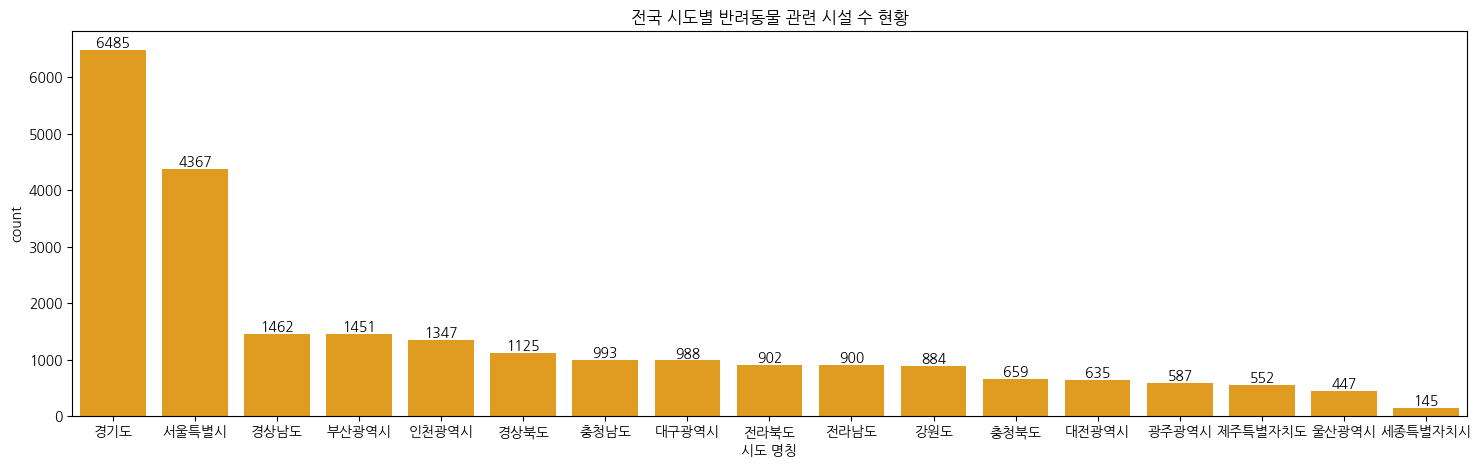

In [ ]:
# 전국 시도별 반려동물 관련 시설 수 현황 -> 수도권에 편향된 반려동물 관련 시설 수
plt.figure(figsize=(18, 5))

plt.title('전국 시도별 반려동물 관련 시설 수 현황')
ax=sns.countplot(data=df, x=df['시도 명칭'], order=df['시도 명칭'].value_counts().index, color='orange')
ax.bar_label(ax.containers[0])
plt.show()

<ipython-input-13-7d913f3c91ae>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




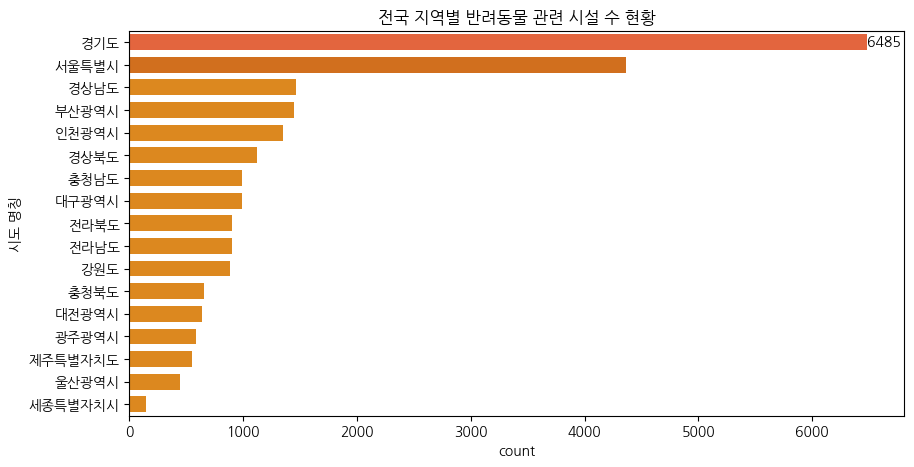

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('전국 지역별 반려동물 관련 시설 수 현황')

# 색상 설정: '경기도'를 제외한 나머지는 'orange', '경기도'는 'red'
palette = ['#FF5722'] + ['#EF6C00'] + ['#FB8C00'] * 15

ax = sns.countplot(data=df, y='시도 명칭', order=df['시도 명칭'].value_counts().index, palette=palette, width=0.7)
ax.bar_label(ax.containers[0])

plt.show()


<ipython-input-15-5b6eceb60039>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




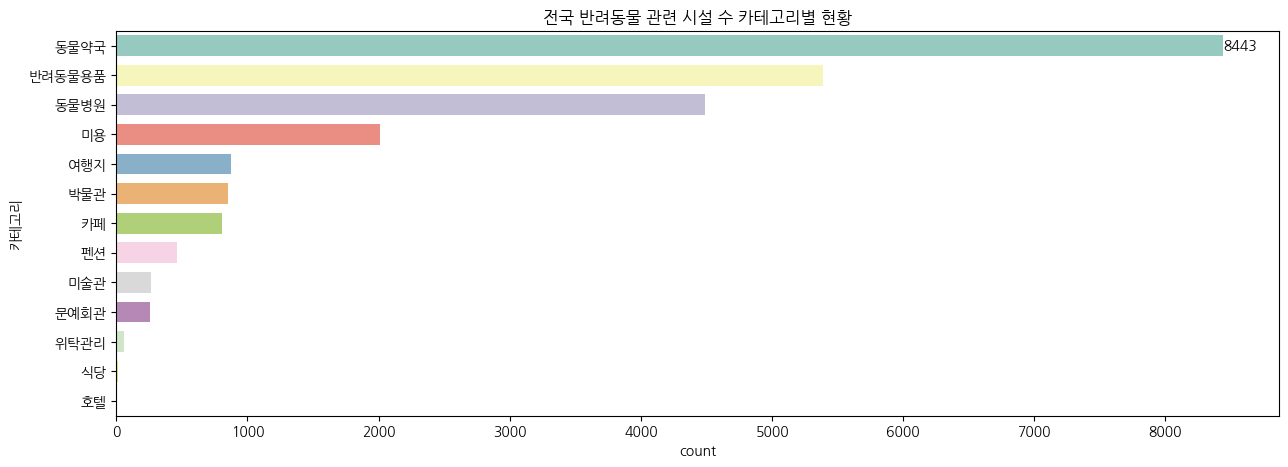

In [ ]:
# 전국 반려동물 관련 시설 수 카테고리별 현황
plt.figure(figsize=(15, 5))

plt.title('전국 반려동물 관련 시설 수 카테고리별 현황')
ax = sns.countplot(data=df, y=df['카테고리'], order=df['카테고리'].value_counts().index, palette='Set3',width=0.7)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
dj_df = df[df['시도 명칭']=='대전광역시']
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 69 to 23848
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시설명     635 non-null    object 
 1   카테고리    635 non-null    object 
 2   시도 명칭   635 non-null    object 
 3   시군구 명칭  635 non-null    object 
 4   위도      635 non-null    float64
 5   경도      635 non-null    float64
dtypes: float64(2), object(4)
memory usage: 34.7+ KB


In [ ]:
seoul_df = df[df['시도 명칭']=='서울특별시']
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4367 entries, 3 to 23927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시설명     4367 non-null   object 
 1   카테고리    4367 non-null   object 
 2   시도 명칭   4367 non-null   object 
 3   시군구 명칭  4367 non-null   object 
 4   위도      4367 non-null   float64
 5   경도      4367 non-null   float64
dtypes: float64(2), object(4)
memory usage: 238.8+ KB


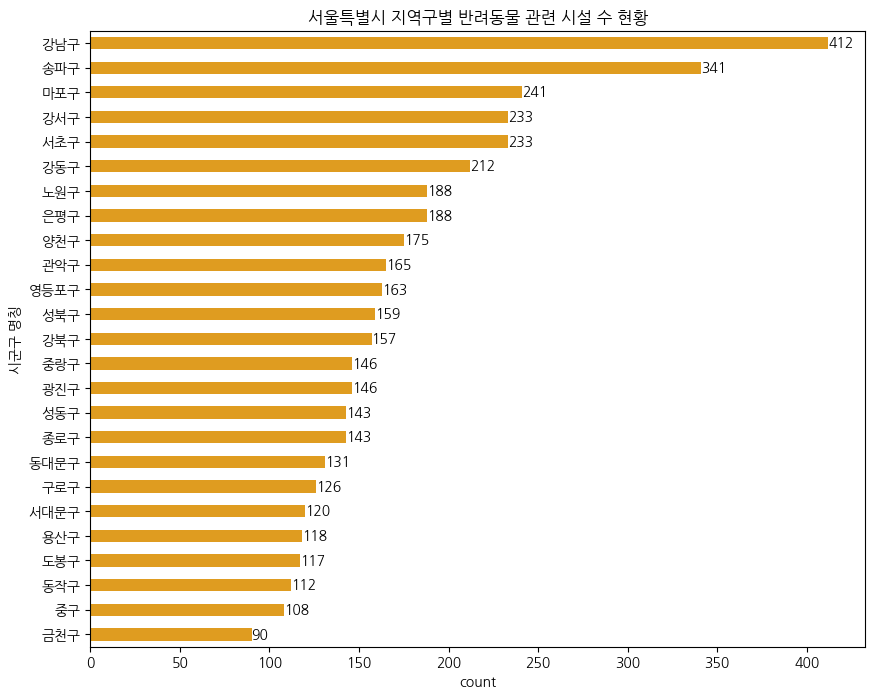

In [ ]:
# 서울특별시 지역구별 반려동물 관련 시설 수 현황
plt.figure(figsize=(10, 8))

plt.title('서울특별시 지역구별 반려동물 관련 시설 수 현황')
ax=sns.countplot(data=seoul_df, y=seoul_df['시군구 명칭'], order=seoul_df['시군구 명칭'].value_counts().index,width=0.5, color='orange')
ax.bar_label(ax.containers[0])
plt.show()

<ipython-input-26-e9a2b57fcdf5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




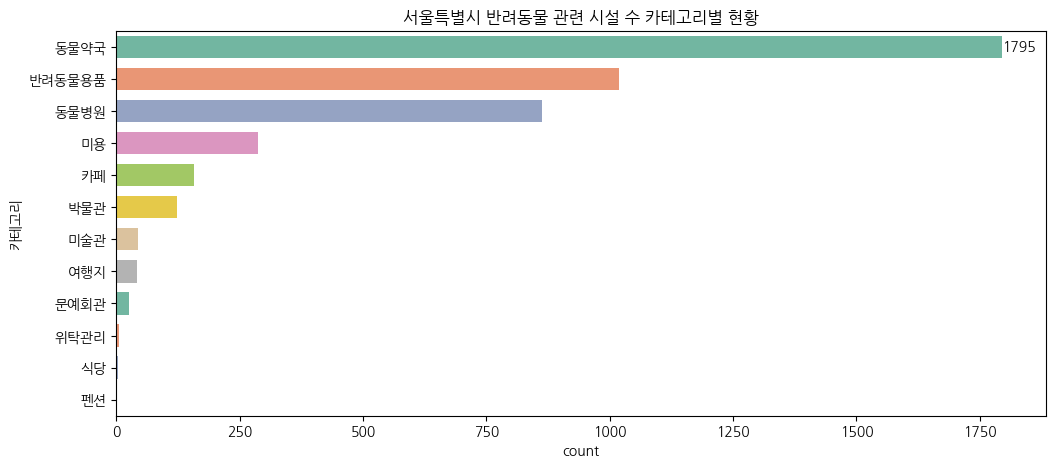

In [ ]:
# 서울특별시 반려동물 관련 시설 수 카테고리별 현황
plt.figure(figsize=(12, 5))

plt.title('서울특별시 반려동물 관련 시설 수 카테고리별 현황')
ax = sns.countplot(data=seoul_df, y=seoul_df['카테고리'], order=seoul_df['카테고리'].value_counts().index, palette='Set2', width=0.7)
ax.bar_label(ax.containers[0])
plt.show()

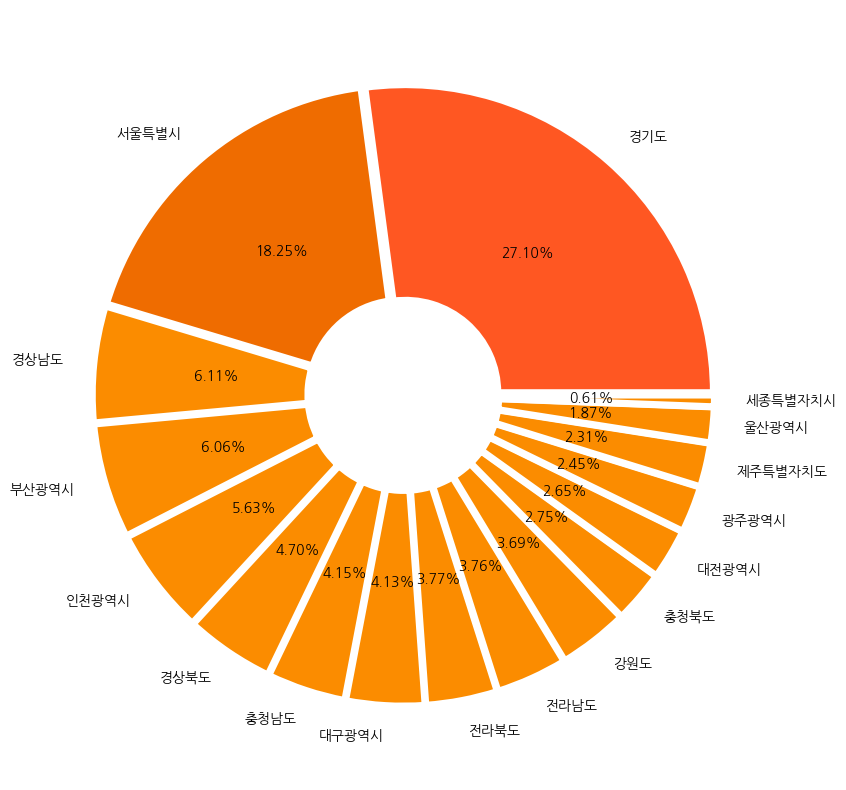

In [ ]:
# 전국 반려동물 시설 비율
plt.figure(figsize=(10,10))

sizes = df['시도 명칭'].value_counts()
explode = [0.01] * len(sizes)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#FF5722'] + ['#EF6C00'] + ['#FB8C00' for _ in range(len(df)-2)]

plt.pie(df['시도 명칭'].value_counts(), labels=df['시도 명칭'].value_counts().index, autopct='%.2f%%', explode=explode, wedgeprops=wedgeprops, colors=colors)
plt.show()

<ipython-input-27-9d29f75e6575>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




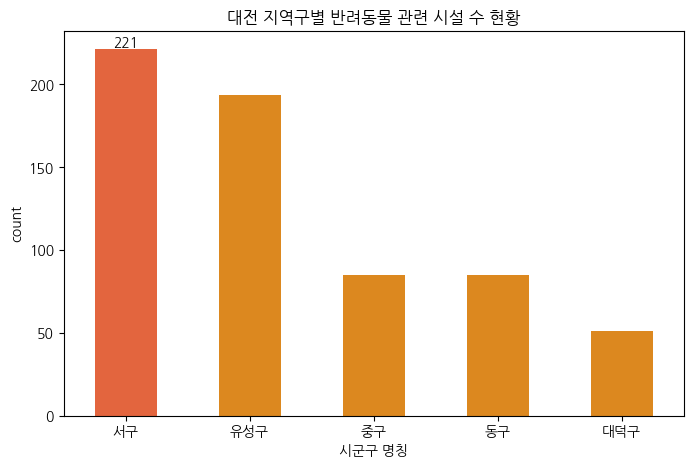

In [ ]:
# 대전 지역구별 반려동물 관련 시설 수 현황
plt.figure(figsize=(8, 5))

plt.title('대전 지역구별 반려동물 관련 시설 수 현황')
ax=sns.countplot(data=dj_df, x=dj_df['시군구 명칭'], order=dj_df['시군구 명칭'].value_counts().index,
              palette=['#FF5722', '#FB8C00', '#FB8C00', '#FB8C00', '#FB8C00'],width=0.5)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
dj_df[dj_df['카테고리']=='위탁관리']

,시설명,카테고리,시도 명칭,시군구 명칭,위도,경도
1516,고양이민박,위탁관리,대전광역시,서구,36.305139,127.351405


<ipython-input-29-631543ceb41c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




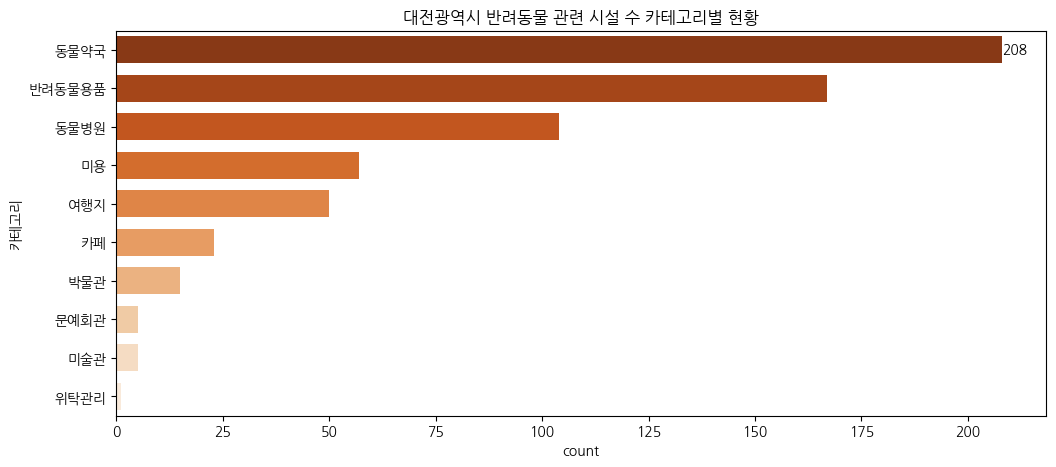

In [ ]:
# 대전광역시 반려동물 관련 시설 수 카테고리별 현황
plt.figure(figsize=(12, 5))

plt.title('대전광역시 반려동물 관련 시설 수 카테고리별 현황')
ax = sns.countplot(data=df, y=dj_df['카테고리'], order=dj_df['카테고리'].value_counts().index, palette='Oranges_r', width=0.7)
ax.bar_label(ax.containers[0])

dj_df = df[df['시도 명칭']=='대전광역시']

In [ ]:
df['카테고리'].unique()

array(['동물약국', '미술관', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당',
       '여행지', '위탁관리', '박물관', '호텔'], dtype=object)

In [ ]:
center = [dj_df['위도'].mean(), dj_df['경도'].mean()]
map = folium.Map(location=center, width=800, height=800)

for n in dj_df.index:
  popup = folium.Popup(dj_df['카테고리'][n] == '카페', max_width=200)
  # 사고 위치 위도, 경도 추출
  lat = dj_df['위도'][n]
  lng = dj_df['경도'][n]

  # 지도에 add
  folium.Marker([lat, lng], popup=popup, icon=folium.Icon(color='orange', icon='dog', prefix='fa')).add_to(map)
map